In [168]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import re
import time
plt.style.use('ggplot')
%matplotlib inline 

__Worapol B. and hamuel.me reserved some right maybe hahaha__

*for muic math club and muic student that want to use this as references*

# Import as DF

From the data seen below we will use "master" section subject only and we will use the number of student in "registered" not actual registered because registered include both master and joint section this will eliminate duplicate section we also remove subject that does not specify the date and time 

In [173]:
df = pd.read_csv('t2_2016.csv')
df = df[df['Type'] == 'master']
df.head()

,Division,Subject,Section,Type,Instructor,Capacity,Actual Registered,Registered,Seat Available,Room/Time,Final
0,SCI,EGCI213 Programming Paradigms 4(4-0-8),1,master,Rangsipan MARUKATAT,20,9,9,11,1408 (Tue 14:00 - 15:50) 1408 ...,[Room-TBA]
1,SS,ICSO303 Modern Social Theory 4(4-0-8),1,master,Hardina OHLENDORF,40,17,17,23,3304 (Tue 16:00 - 17:50) 3304 ...,[Room-TBA]
2,BBA,ICIS370 Web Programming 4(4-0-8),1,master,Chaivatna SUMETPHONG,40,6,6,34,1514/1 (Fri 12:00 - 13:50) 151...,[Room-TBA]
3,SCI,ICBI384 Field Study on Ecology and Biodiversit...,1,master,Wayne Nicholas PHILLIPS,25,26,26,-1,NaN,[Room-TBA]
6,SS,ICSO401 Independent Study in the Social Scienc...,1,master,Nigel Gould Davies,5,1,1,4,NaN,[Room-TBA]


In [180]:
#format [Day, start_time, end_time]
def time_extract(s):
    s = str(s).strip().split(" "*16)
    def helper(s):
        try:
            temp = s.strip().split(" ")[1:]
            comb = temp[:2] + temp[3:]
            comb[0] = comb[0][1:]
            comb[2] = comb[2][:-1]
            return comb
        except:
            temp = s.strip().split(" ")
            comb = temp[:2] + temp[3:]
            comb[0] = comb[0][1:]
            comb[2] = comb[2][:-1]
            return comb
    top = helper(s[0])
    if len(s) > 1:
        bottom = helper(s[1])
        return top, bottom
    return top

# df.iloc[791]
# time_extract(df['Room/Time'][791])

tdf = df[df['Room/Time'].notnull()]['Room/Time']

tdf.apply(time_extract)[:10]


0     ([Tue, 14:00, 15:50], [Thu, 14:00, 15:50])
1     ([Tue, 16:00, 17:50], [Thu, 16:00, 17:50])
2     ([Fri, 12:00, 13:50], [Fri, 14:00, 15:50])
9     ([Tue, 14:00, 15:50], [Thu, 14:00, 15:50])
16                           [Mon, 08:00, 12:00]
17    ([Mon, 10:00, 11:50], [Wed, 10:00, 11:50])
18    ([Tue, 14:00, 15:50], [Thu, 14:00, 15:50])
19    ([Mon, 14:00, 15:50], [Wed, 14:00, 15:50])
20    ([Tue, 12:00, 13:50], [Thu, 12:00, 13:50])
21                           [Fri, 08:00, 11:50]
Name: Room/Time, dtype: object

Here we want to generate a histogram that is in the following format 

`[t1 , t2, ..., tn]`

Here t1 could is the time from 8 - 9 
the following is the logic in putting the subject in the correct time freq 
we use the example of 8-10 we round up the 50 to 60 



We aim to plot a histogram from Monday to Friday 

In [175]:
def normalize_time(t):
    temp = t.split(":")
    h = int(temp[0]) * 60
    m = 60 if int(temp[1]) == 50 else 0
    return int(h + m) 



## Histogram for Monday

monday frequency of people in classes

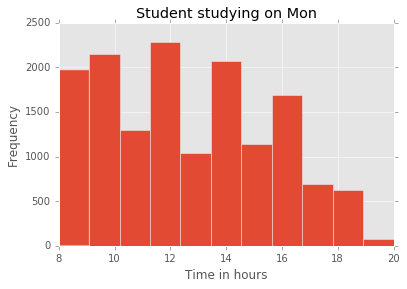

In [189]:
def gen_hist(day):
    filtered = []
    for i,d in zip(tdf.index, tdf.apply(time_extract)):
        if len(d) == 2:
            for dd in d:
                if dd[0] == day:
                    filtered.append((i, dd))
        else:
            if d[0] == day:
                filtered.append((i, d))
    hist = []

    for i, d in filtered:
        start = normalize_time(d[1])
        end = normalize_time(d[2])
        cc = start 
        while cc <= end:
            for f in range(df['Registered'][i]):
                hist.append(cc/60)
            cc += 60
    plt.title("Student studying on " + day)
    plt.ylabel("Frequency")
    plt.xlabel("Time in hours")
    plt.hist(hist, bins=11);
#     return hist

gen_hist('Mon')

## Histogram for Tuesday 

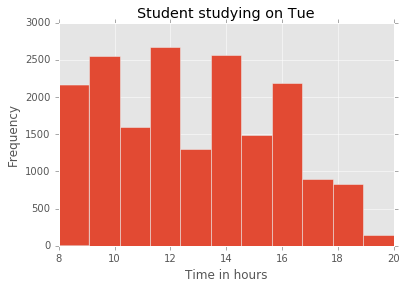

In [190]:
gen_hist('Tue')

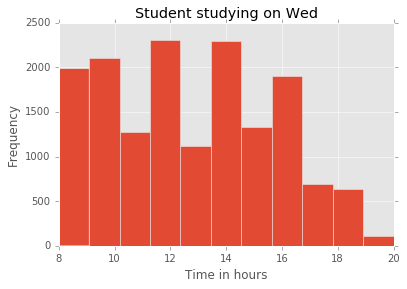

In [191]:
gen_hist('Wed')

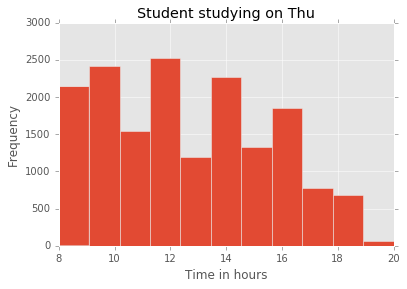

In [192]:
gen_hist('Thu')

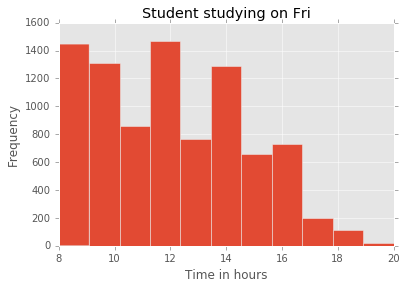

In [193]:
gen_hist('Fri')

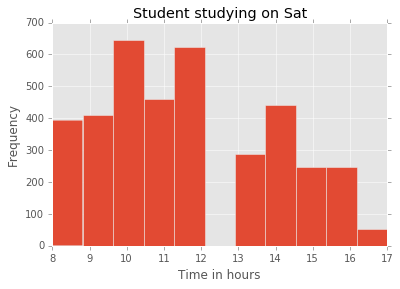

In [194]:
gen_hist('Sat')